In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Import the dataset
df_train = pd.read_csv('/content/drive/My Drive/cleaned_data.csv')

In [8]:
X = df_train['LIMIT_BAL'].values.reshape(-1,1)
y = df_train['default payment next month']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
X_train.shape, X_test.shape ,y_train.shape , X_test.shape

((21331, 1), (5333, 1), (21331,), (5333, 1))

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [11]:
# fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
# predictiing the test result
y_pred = classifier.predict(X_test)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [12]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
y_pred_prob= classifier.predict_proba(X_test)

In [14]:
y_pred_prob_2 = y_pred_prob[:,1]
y_pred_prob_2

array([0.07145372, 0.1098622 , 0.41643062, ..., 0.22885347, 0.20590735,
       0.08094375])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [16]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_pred_prob_2)

0.6196226715625339

_________________________________________________________________________
**Now, plot the ROC curve.**


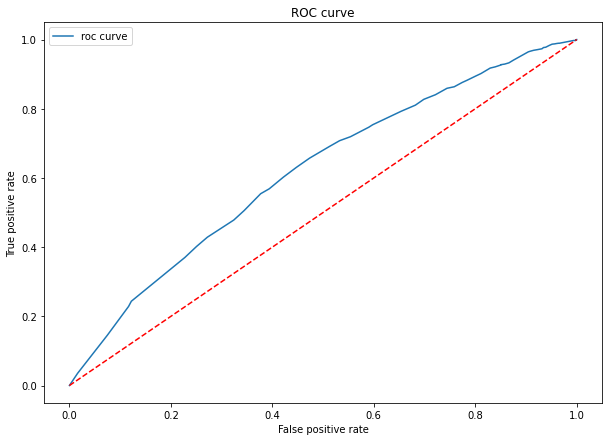

In [17]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test , y_pred_prob_2)
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label = 'roc curve')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [18]:
from sklearn.metrics import precision_recall_curve
precision_recall_curve(y_test , y_pred_prob_2)

(array([0.21181989, 0.21171171, 0.21175145, 0.21179121, 0.21164319,
        0.21168295, 0.2117625 , 0.21161436, 0.21169393, 0.21177356,
        0.21185325, 0.21193299, 0.21197289, 0.21209267, 0.21213263,
        0.21225259, 0.21229261, 0.21576202, 0.21609596, 0.21665696,
        0.21705275, 0.2178334 , 0.21820326, 0.21838627, 0.21857058,
        0.21919714, 0.21914257, 0.22043443, 0.22141267, 0.22219959,
        0.22260834, 0.22395614, 0.22428115, 0.22530069, 0.22652531,
        0.22635793, 0.22762092, 0.22905151, 0.22990063, 0.23075166,
        0.23216783, 0.23303487, 0.23414986, 0.23664308, 0.23832245,
        0.24128132, 0.24193548, 0.24560922, 0.25297265, 0.25361011,
        0.2585164 , 0.26300197, 0.26584867, 0.2715959 , 0.27458542,
        0.27721158, 0.27937337, 0.28312981, 0.28281327, 0.28391167,
        0.29748002, 0.30106101, 0.304     , 0.34898477, 0.34491979,
        0.34309623, 0.37037037, 1.        ]),
 array([1.        , 0.99911426, 0.99911426, 0.99911426, 0.99822852,
  

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


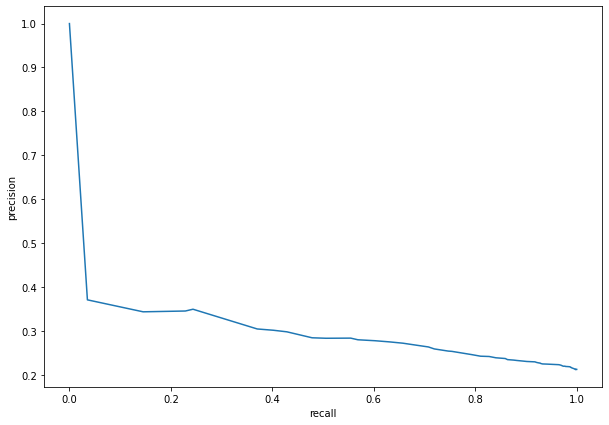

In [19]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision , recall ,threshold = precision_recall_curve(y_test , y_pred_prob_2)
plt.figure(figsize=(10,7))
plt.plot(recall ,precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [20]:
from sklearn.metrics import auc
print(auc(recall, precision))

0.30350381273417226


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [21]:
y_pred_prob_train = classifier.predict_proba(X_train)
print(roc_auc_score(y_train , y_pred_prob_train[:,1]))

0.6185139090400076


    How is this different, conceptually and quantitatively, from your earlier calculation?
